In [6]:
from PIL import Image 
import cv2
import numpy as np
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import matplotlib.image as img


def compute_histogram(image, num_bins=256):
    # Initialize an array to store histogram values
    histogram = [0] * num_bins
    
    # Get image dimensions
    width = np.shape(image)[1]
    height = np.shape(image)[0]
    
    # Loop through each pixel and increment the histogram bin
    for y in range(height):
        for x in range(width):
            pixel_value = image[y][x]
            histogram[pixel_value] += 1
    
    return histogram

def calculate_within_class_variance(hist, thresholds):
    start = timer()
    
    total_pixels = np.sum(hist)
    within_class_variances = []

    for t in thresholds:
        class1_pixels = np.sum(hist[:t])
        class2_pixels = total_pixels - class1_pixels

        if (class1_pixels == 0 or class2_pixels == 0) :
            within_class_variances.append(np.inf)
            continue

        mean1 = np.sum(np.arange(t) * hist[:t]) / class1_pixels
        mean2 = np.sum(np.arange(t, len(hist)) * hist[t:]) / class2_pixels

        var1 = np.sum(((np.arange(t) - mean1) ** 2) * hist[:t]) / class1_pixels
        var2 = np.sum(((np.arange(t, len(hist)) - mean2) ** 2) * hist[t:]) / class2_pixels

        within_class_variances.append((class1_pixels * var1 + class2_pixels * var2)/total_pixels)
        
    end = timer()
    print("Time taken for computing within_class_variances for different thresholds is ",end - start)

    return within_class_variances

def calculate_between_class_variance(hist, thresholds):
    start = timer()
    
    total_pixels = np.sum(hist)
    total_mean = np.sum(np.arange(len(hist)) * hist) / total_pixels
    between_class_variances = []

    for t in thresholds:
        class1_pixels = np.sum(hist[:t])
        class2_pixels = total_pixels - class1_pixels

        if class1_pixels == 0 or class2_pixels == 0:
            between_class_variances.append(0)
            continue

        mean1 = np.sum(np.arange(t) * hist[:t]) / class1_pixels
        mean2 = np.sum(np.arange(t, len(hist)) * hist[t:]) / class2_pixels

        between_class_variances.append(((class1_pixels * (mean1 - total_mean)**2) + (class2_pixels * (mean2 - total_mean) ** 2))/total_pixels)
    
    end = timer()
    
    print("Time taken for computing between_class_variances for different thresholds is ",end - start)
    
    return between_class_variances

def binarized_image(image, threshold):
    dim1 = np.shape(image)[0]
    dim2 = np.shape(image)[1]
    for i in range(dim1):
        for j in range(dim2):
            if(image[i][j] >= threshold):
                image[i][j] = 255
            else:
                image[i][j] = 0
    plt.gray()
    plt.axis('off')
    plt.imshow(image)
    plt.show()
    
    return image




Original Image is


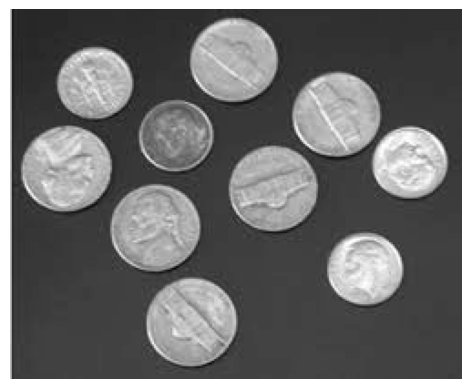

Time taken for computing within_class_variances for different thresholds is  0.060205899993889034
Time taken for computing between_class_variances for different thresholds is  0.03885370003990829

The least within class variance obtained is: 265.10245711480326

The highest between class variance obtained is: 2865.701763856909

Optimal Threshold (Minimizing Within-Class Variance): 126

Optimal Threshold (Maximizing Between-Class Variance): 126

Binarized image using within_class variance minimization


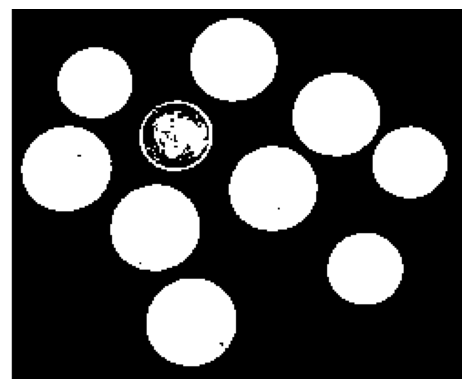


Binarized image using between_class variance maximization


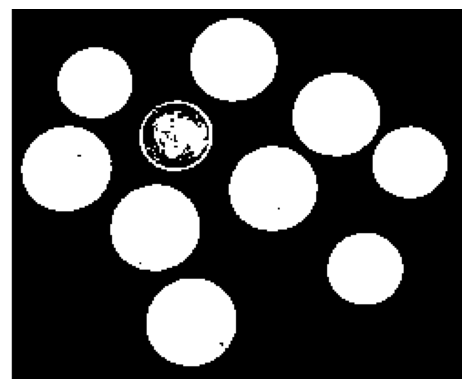

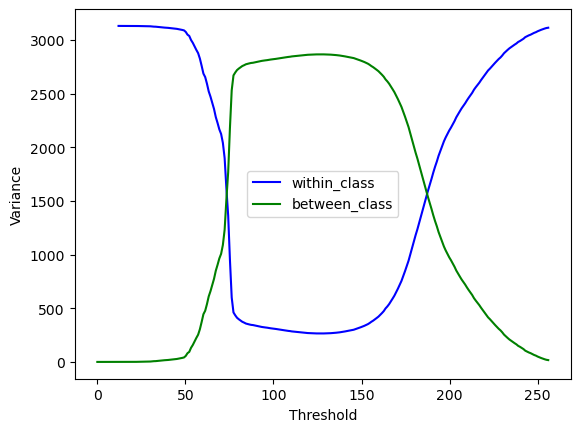

In [18]:

def main():
    # Load the image
    image = Image.open('coins.png')
    image = np.array(image)
    print('Original Image is')
    plt.gray()
    plt.axis('off')
    plt.imshow(image)
    plt.show()


    # Calculate the histogram manually
    hist = compute_histogram(image)

    # Possible threshold values
    thresholds = np.arange(256)


    # Calculate within-class and between-class variances
    within_class_variances = calculate_within_class_variance(hist, thresholds)
    between_class_variances = calculate_between_class_variance(hist, thresholds)

    #The minimum within_class variance obtained and Maxinmum between class variance obtained are
    within_class_variance = np.min(within_class_variances)
    between_class_variance = np.max(between_class_variances)
    print("\nThe least within class variance obtained is:", within_class_variance)
    print("\nThe highest between class variance obtained is:", between_class_variance)
    
    
    # Find the optimal threshold based on each approach
    optimal_threshold_within = thresholds[np.argmin(within_class_variances)]
    optimal_threshold_between = thresholds[np.argmax(between_class_variances)]

    print("\nOptimal Threshold (Minimizing Within-Class Variance):", optimal_threshold_within)
    print("\nOptimal Threshold (Maximizing Between-Class Variance):", optimal_threshold_between)

    print('\nBinarized image using within_class variance minimization')
    binarized_image(image, optimal_threshold_within)
    print('\nBinarized image using between_class variance maximization')
    binarized_image(image, optimal_threshold_between)
    
    x = np.linspace(0, 256, 256)
    y = within_class_variances
    z = between_class_variances
    plt.xlabel("Threshold")
    plt.ylabel("Variance")
    plt.plot(x, y, color = 'blue', label = 'within_class')
    plt.plot(x, z, color = 'green', label = 'between_class')
    plt.legend()
    plt.show()
    
    return 1

if __name__ == '__main__':
    main()

    